<a href="https://colab.research.google.com/github/tekgulburak/Deep-Neural-Networks-on-a-GPU/blob/main/Training_Deep_Neural_Networks_on_a_GPU_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline


# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [3]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
len(dataset)

60000

In [5]:
dataset[10]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

image.shape: torch.Size([1, 28, 28])
label: 0


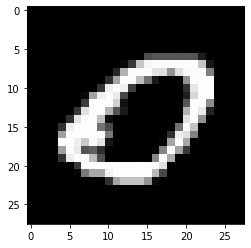

In [6]:
image,label=dataset[1]
print("image.shape:",image.shape)
plt.imshow(image.permute(2,1,0),cmap="gray")
print("label:",label)

In [7]:
val_size=10000
train_size=len(dataset)-val_size
train_ds,val_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

(50000, 10000)

In [8]:
batch_size=128

In [9]:
train_loader=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_loader=DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


images:shape: torch.Size([128, 1, 28, 28])


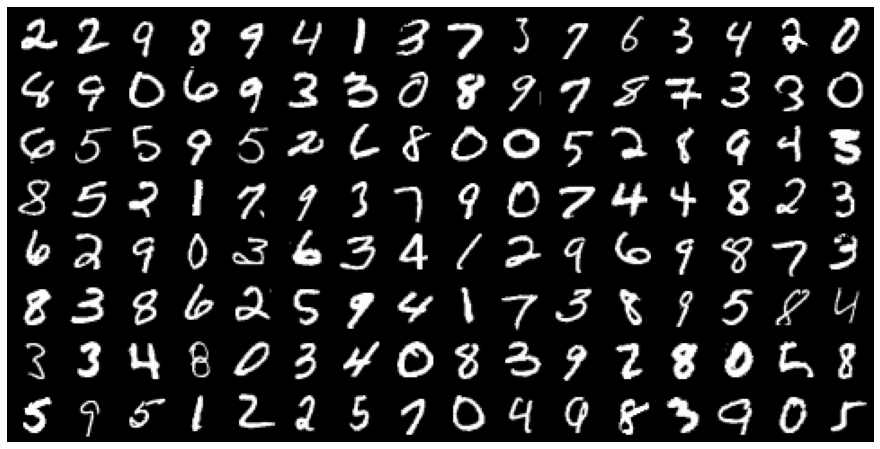

In [10]:
for images,_ in train_loader:
  print("images:shape:",images.shape)
  plt.figure(figsize=(16,8))
  plt.axis("off")
  plt.imshow(make_grid(images,nrow=16).permute((1,2,0)))
  break
  

In [11]:
for images,labels in train_loader:
  print("images.shape:",images.shape)
  inputs=images.reshape(-1,784)
  print("inputs.shape:",inputs.shape)
  break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


In [12]:
print(inputs.shape)

torch.Size([128, 784])


In [13]:
input_size=inputs.shape[-1]
hidden_size=32

In [14]:
layer1=nn.Linear(input_size,hidden_size)

In [15]:
layer1_outputs=layer1(inputs)
print("layer1 outputs is :",layer1_outputs.shape)

layer1 outputs is : torch.Size([128, 32])


In [16]:
####you can see this evaulation in under cell
layer1_outputs_result=inputs@layer1.weight.t() + layer1.bias
layer1_outputs_result.shape

torch.Size([128, 32])

In [17]:
torch.allclose(layer1_outputs,layer1_outputs_result)

True

In [18]:
F.relu(torch.tensor([[3,-1,0],
                     [0.3,-3.5,18]
    
                     ]))

tensor([[ 3.0000,  0.0000,  0.0000],
        [ 0.3000,  0.0000, 18.0000]])

In [19]:
relu_outputs=F.relu(layer1_outputs)
print("min(layer1_outputs:",torch.min(layer1_outputs).item())
print("min relu outputs:",torch.min(relu_outputs).item())

min(layer1_outputs: -0.8390312194824219
min relu outputs: 0.0


In [20]:
##bundan sonra 2.layera geçiyoruz.yani ara katmandan çıkış katmanına
output_size=10
layer2=nn.Linear(hidden_size,output_size)

In [21]:
layer2_outputs=layer2(relu_outputs)
layer2_outputs.shape

torch.Size([128, 10])

In [22]:
F.cross_entropy(layer1_outputs,labels)


tensor(3.4335, grad_fn=<NllLossBackward0>)

In [23]:
outputs=(F.relu(inputs@layer1.weight.t()+layer1.bias))@layer2.weight.t()+layer2.bias

In [24]:
outputs.shape

torch.Size([128, 10])

In [25]:
torch.allclose(outputs,layer2_outputs,1e-3)

True

In [26]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, input_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(input_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, a):
        # Flatten the image tensors
        a = a.view(a.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(a)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
      
   
  
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [27]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [28]:
input_size=784
hidden_size=32
num_classes=10

In [29]:
model=MnistModel(input_size,hidden_size=32,out_size=num_classes)

In [30]:
for t in model.parameters():
  print(t.shape)
  

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [31]:
for images,labels in train_loader:
  outputs=model(images)
  loss=F.cross_entropy(outputs,labels)
  print("Loss:",loss.item())
  break

print("outputs.shape:",outputs.shape)
print("Sample outputs:\n",outputs[:2].data)

Loss: 2.3305959701538086
outputs.shape: torch.Size([128, 10])
Sample outputs:
 tensor([[ 0.0099,  0.1960,  0.1051, -0.0214, -0.0248,  0.1683, -0.0011,  0.1709,
          0.0039,  0.3263],
        [ 0.0081,  0.1710,  0.1404, -0.0348, -0.1081,  0.1880, -0.0573,  0.2291,
         -0.0951,  0.2589]])


In [32]:
torch.cuda.is_available()

True

In [33]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device("cuda")

  else:
    return torch.device("cpu")

  

In [34]:
device=get_default_device()
device

device(type='cuda')

In [35]:
def to_device(data,device):
  """move tensors to chosen device"""
  if isinstance(data,(list,tuple)):
    return[to_device(x,device) for x in data]
  
  return data.to(device,non_blocking=True)

In [36]:
for images,labels in train_loader:
  print(images.shape)
  images=to_device(images,device)
  print(images.device)
  break

torch.Size([128, 1, 28, 28])
cuda:0


In [37]:
class DeviceDataLoader():
  #wrap a dataloader to move data to a device
  def __init__(self,dl,device):
    self.dl=dl
    self.device=device

  def __iter__(self):
    #yield a batch of data moving it to device
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    #number of batches
    return len(self.dl)
    

In [38]:
#example for use of yield
def some_numbers():
  yield 5
  yield 10
  yield 15

for value in some_numbers():
  print(value)

5
10
15


In [39]:
train_loader=DeviceDataLoader(train_loader,device)
val_loader=DeviceDataLoader(val_loader,device)

In [40]:
for xb,yb in val_loader:
  print("xb.device:",xb.device)
  print("yb:",yb)
  break

xb.device: cuda:0
yb: tensor([1, 5, 2, 6, 1, 0, 5, 2, 2, 1, 3, 8, 2, 4, 2, 6, 1, 3, 5, 0, 9, 2, 4, 0,
        9, 0, 8, 2, 5, 7, 3, 4, 5, 8, 6, 1, 3, 1, 5, 7, 6, 8, 4, 8, 7, 8, 7, 4,
        2, 8, 8, 9, 7, 5, 1, 3, 9, 9, 1, 1, 0, 8, 7, 6, 1, 3, 7, 0, 9, 2, 9, 7,
        9, 3, 2, 5, 2, 1, 4, 3, 9, 7, 3, 0, 4, 3, 5, 6, 3, 4, 5, 2, 1, 4, 3, 5,
        2, 8, 8, 1, 7, 1, 5, 7, 5, 2, 7, 2, 7, 7, 9, 2, 0, 4, 0, 7, 0, 0, 8, 4,
        2, 8, 9, 9, 9, 1, 9, 5, 5, 0, 1, 3, 1, 1, 2, 1, 8, 2, 3, 5, 1, 6, 4, 1,
        3, 2, 8, 1, 8, 8, 6, 6, 1, 6, 3, 4, 7, 9, 8, 6, 9, 4, 1, 6, 8, 2, 4, 9,
        8, 3, 5, 8, 7, 3, 4, 1, 1, 1, 5, 3, 3, 7, 9, 6, 7, 2, 9, 9, 5, 4, 8, 3,
        1, 0, 5, 8, 9, 6, 0, 9, 1, 4, 1, 0, 6, 7, 9, 4, 4, 9, 5, 5, 7, 0, 7, 3,
        5, 7, 8, 0, 4, 8, 9, 3, 4, 2, 6, 8, 5, 4, 6, 1, 1, 7, 2, 6, 2, 4, 0, 2,
        3, 1, 8, 1, 4, 6, 6, 8, 4, 4, 7, 6, 5, 3, 5, 9], device='cuda:0')


In [41]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [42]:
#model on GPU
model=MnistModel(input_size,hidden_size=hidden_size,out_size=num_classes)
to_device(model,device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [43]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.3071091175079346, 'val_acc': 0.09912109375}]

In [44]:
history+=fit(5,0.1,model,train_loader,val_loader)

Epoch [0], val_loss: 0.3572, val_acc: 0.8953
Epoch [1], val_loss: 0.3001, val_acc: 0.9113
Epoch [2], val_loss: 0.2639, val_acc: 0.9230
Epoch [3], val_loss: 0.2464, val_acc: 0.9296
Epoch [4], val_loss: 0.2335, val_acc: 0.9334


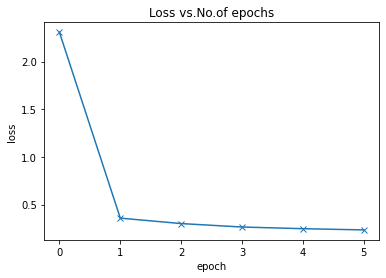

In [45]:
losses=[x["val_loss"] for x in history]
plt.plot(losses,"-x")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss vs.No.of epochs");


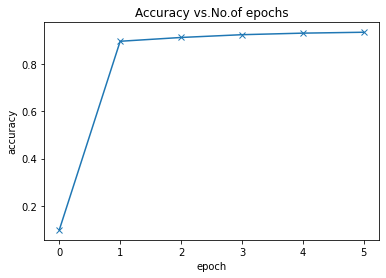

In [46]:
accuracies=[x["val_acc"] for x in history]
plt.plot(accuracies,"-x")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy vs.No.of epochs");

In [47]:
#Define test dataset
test_dataset=MNIST(root="data/",train=False,transform=ToTensor())


In [48]:
def predict_image(img,model):
  xb=to_device(img.unsqueeze(0),device)
  yb=model(xb)
  _,preds=torch.max(yb,dim=1)
  return preds[0].item()


label: 7 predicted: 7


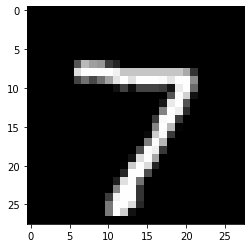

In [49]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap="gray")
print("label:",label,"predicted:",predict_image(img,model))


In [51]:
test_loader=DeviceDataLoader(DataLoader(test_dataset,batch_size=256),device)
result=evaluate(model,test_loader)
result

{'val_loss': 0.21904440224170685, 'val_acc': 0.933886706829071}